## The dataset used in this project is the result of political polls taken during the 2012 American Presidential Election

### Import libraries and load in the data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the data set
df = pd.read_csv("2012-general-election-romney-vs-obama.csv")

In [24]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,NaN,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,NaN,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,NaN,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,NaN,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,NaN,NaN,1


In [25]:
df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             106 non-null    ob

### TASK: A VISUALIZATION OVERVIEW OF THE AFFILIATION OF THE POLLS

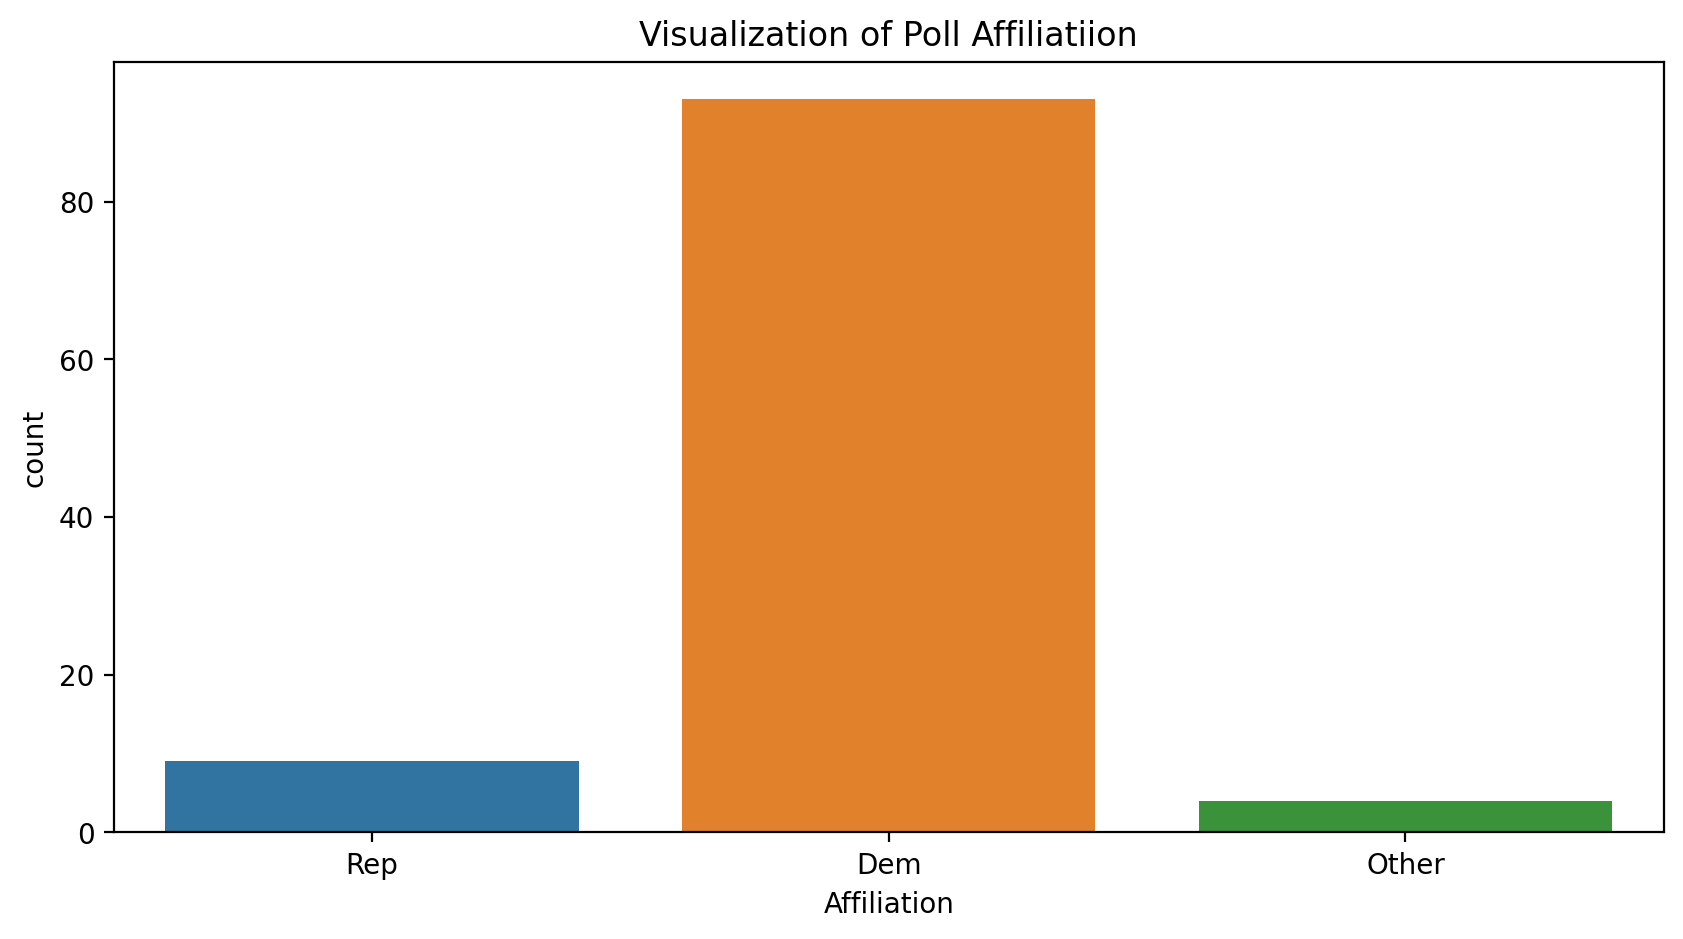

In [27]:
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(data=df,x="Affiliation")
plt.title("Visualization of Poll Affiliatiion");

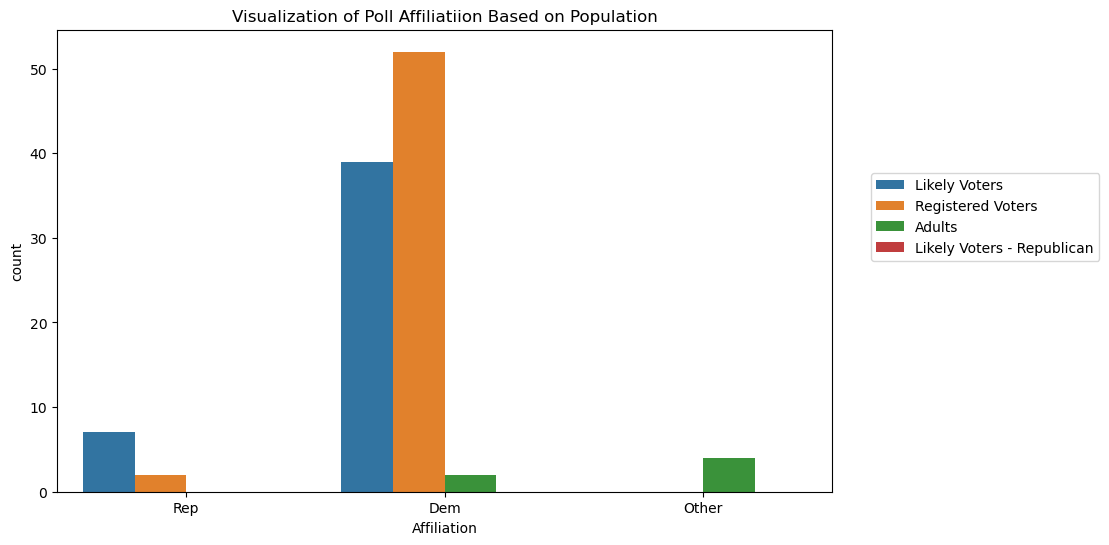

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Affiliation",hue="Population")
plt.title("Visualization of Poll Affiliatiion Based on Population")

plt.legend(loc=(1.05,0.5));

### TASK: Average number of points for Obama, Romney, and Undecided Voters.

In [29]:
obama = df["Obama"].mean()
romney = df["Romney"].mean()
undecided = df["Undecided"].mean()

print(f"The average number of points for Obama is {round(obama,2)}")
print(f"The average number of points for Romney is {round(romney,2)}")
print(f"The average number of points for the Undecided Voters is {round(undecided,2)}")

The average number of points for Obama is 46.81
The average number of points for Romney is 44.61
The average number of points for the Undecided Voters is 6.55


### TASK: Standard Deviation of points for Obama, Romney, and Undecided Voters.

In [30]:
obama_std = df["Obama"].std()
romney_std = df["Romney"].std()
undecided_std = df["Undecided"].std()

print(f"The Standard Deviation of points for Obama is {round(obama_std,2)}")
print(f"The Standard Deviation of points for Romney is {round(romney_std,2)}")
print(f"The Standard Deviation of points for the Undecided Voters is {round(undecided_std,2)}")

The Standard Deviation of points for Obama is 2.42
The Standard Deviation of points for Romney is 2.91
The Standard Deviation of points for the Undecided Voters is 3.7


### TASK: VISUALIZATION OF VOTER SENTIMENT OVER TIME

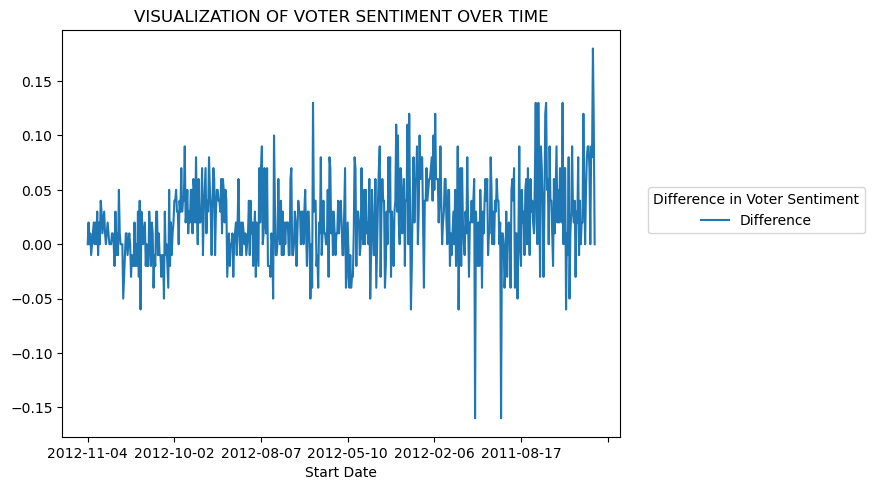

In [31]:
from datetime import datetime
# New column to track the diffrence in voter sentiment between the two candidates
df["Difference"] = (df["Obama"] - df["Romney"]) / 100

# Positive difference indicates a shift towards Obama in the polls
# Negative difference indicates a shift towards Romney in the polls

df.plot("Start Date","Difference")
plt.tight_layout()
plt.title("VISUALIZATION OF VOTER SENTIMENT OVER TIME")
plt.legend(loc=(1.05,0.5), title="Difference in Voter Sentiment");

### TASK: VISUALIZATION THAT COMPARES THE VARIOUS AFFILIATED POLLSTERS AGAINST THE NUMBER OF OBSERVATIONS TAKEN IN THIER POLLS

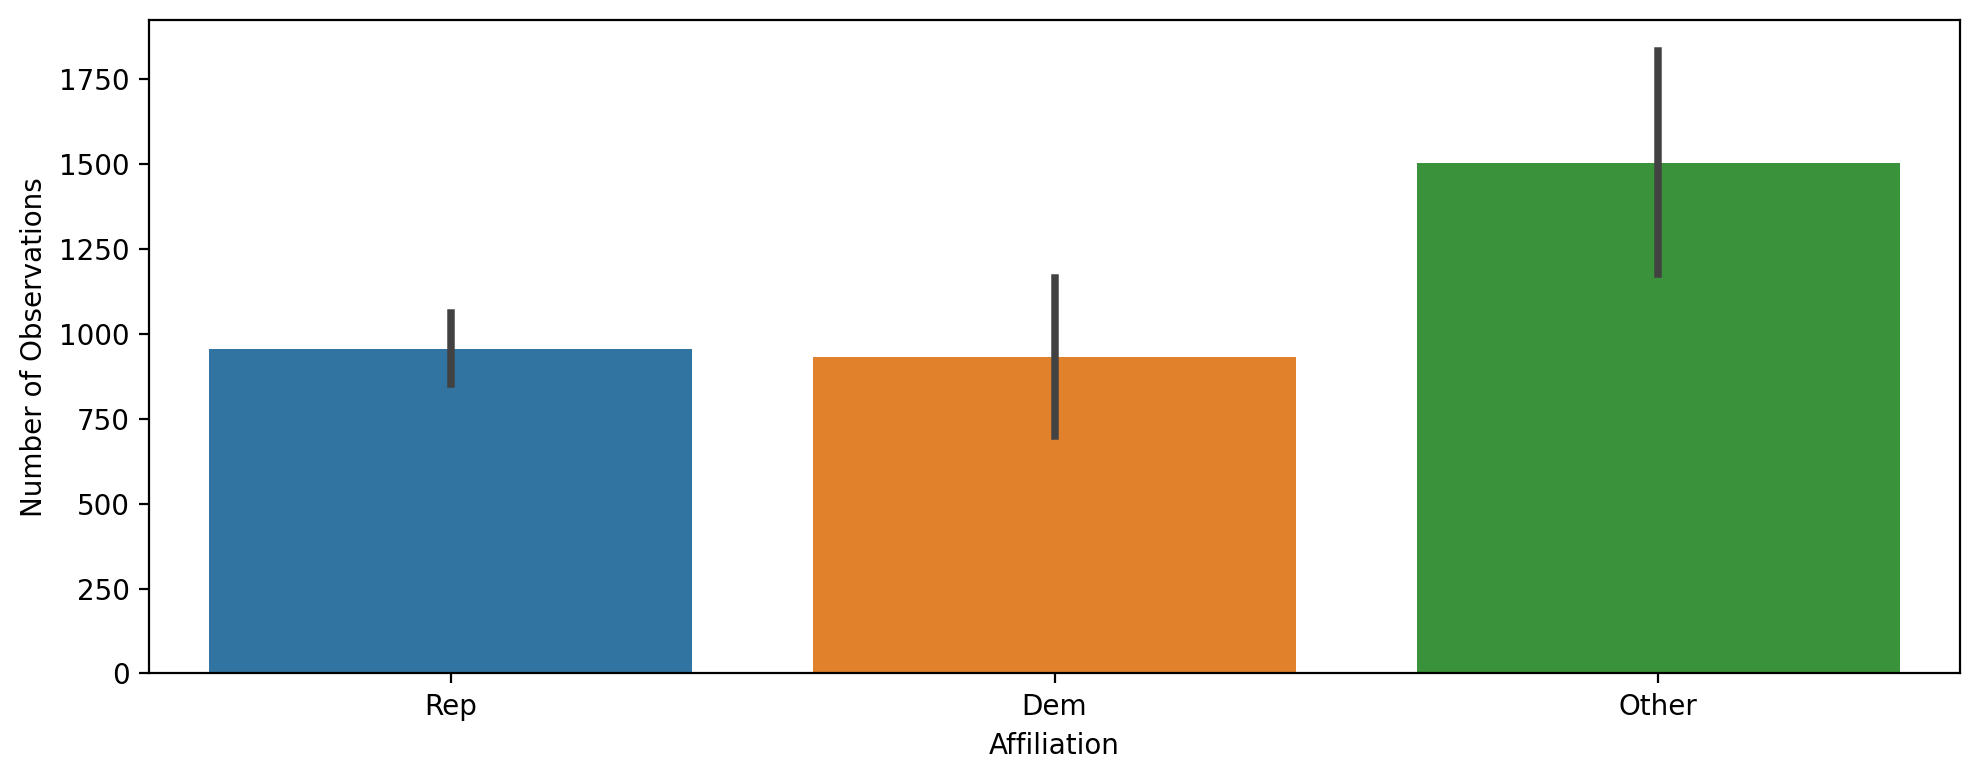

In [32]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=df,x="Affiliation",y="Number of Observations",estimator=np.mean,errorbar="sd")
plt.tight_layout()

### TASK: VISUALIZATION OF MODE OF CONDUCTING POLLS

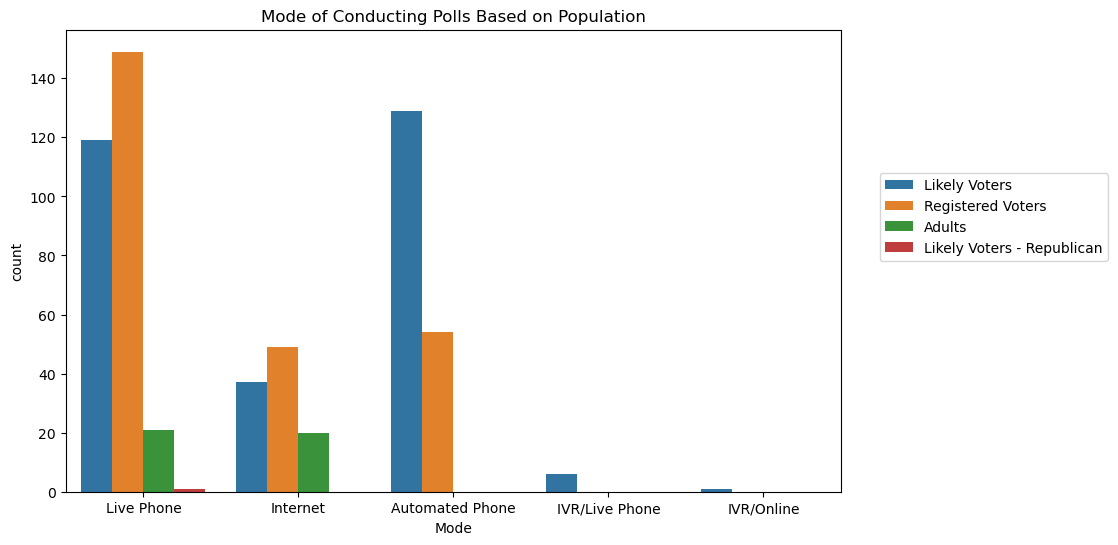

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Mode",hue="Population")
plt.title("Mode of Conducting Polls Based on Population")

plt.legend(loc=(1.05,0.5));